# OCD Vs ADHD Mental Health Classifier

#### Project Overview
This project implements machine learning classifiers to distinguish between Reddit posts related to Obsessive-Compulsive Disorder (OCD) and Attention Deficit Hyperactivity Disorder (ADHD). The system uses Natural Language Processing (NLP) techniques and ensemble learning methods to analyze text patterns and classify mental health-related discussions.


# 1. Data Loading and Initial Exploration

## 1.1. Import Required Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## 1.2. Load the Dataset

In [3]:
#Load Dataset
df= pd.read_csv('dataset.csv')
df

,body,subreddit
0,Thank you.\n\nMy son was recently diagnosed an...,1
1,"Omg. Yes, I didn’t realize how close this was ...",0
2,I love how our positive way is to laugh of our...,1
3,"I am really, really struggling with the sudden...",0
4,i was just unconciously procrastinating doing ...,1
...,...,...
23995,I have to walk around in a particular pattern ...,0
23996,I handwash my water bottles and i may have had...,0
23997,"Love how the same people who say ""oh I'm so OC...",0
23998,i wish my brain would obsess over the tasks at...,0


## 1.3. Initial Dataset Inspection

In [5]:
print(f"Dataset Shape: {df.shape}")

Dataset Shape: (24000, 2)


In [6]:
print(f"Columns: {df.columns.tolist()}")

Columns: ['body', 'subreddit']


In [7]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
                                                body  subreddit
0  Thank you.\n\nMy son was recently diagnosed an...          1
1  Omg. Yes, I didn’t realize how close this was ...          0
2  I love how our positive way is to laugh of our...          1
3  I am really, really struggling with the sudden...          0
4  i was just unconciously procrastinating doing ...          1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   body       24000 non-null  object
 1   subreddit  24000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.1+ KB


## 1.4. Class Distribution Analysis

In [10]:
# Analyze Class Distribution
class_dist = df['subreddit'].value_counts()
print("Class Distribution:")
print(f"ADHD posts (1): {class_dist[1]}")
print(f"OCD posts (0): {class_dist[0]}")

Class Distribution:
ADHD posts (1): 12000
OCD posts (0): 12000


## 1.5. Class Distribution Visualization

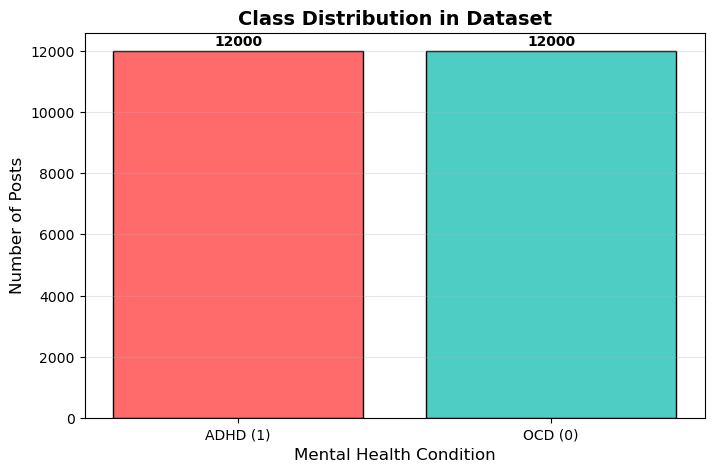

In [12]:
# Visualization
plt.figure(figsize=(8, 5))
colors = ['#FF6B6B', '#4ECDC4']
plt.bar(['ADHD (1)', 'OCD (0)'], [class_dist[0], class_dist[1]], 
        color=colors, edgecolor='black')
plt.title('Class Distribution in Dataset', fontsize=14, fontweight='bold')
plt.xlabel('Mental Health Condition', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.text(1, class_dist[0]+200, str(class_dist[1]), ha='center', fontweight='bold')
plt.text(0, class_dist[1]+200, str(class_dist[0]), ha='center', fontweight='bold')
plt.grid(axis='y', alpha=0.3)
plt.show()

**Intrepretation:**

- The dataset is perfectly balanced dataset with 12,000 posts for each class.

- This prevents class imbalance issues in model training.



# 2. Data Cleaning and Preprocessing

## 2.1. Check for Missing Values

In [16]:
df.isnull().sum()

body         0
subreddit    0
dtype: int64

## 2.2. Duplicate Analysis

In [18]:
# Find all duplicates in the 'body' column
duplicates = df[df.duplicated(subset='body', keep=False)]

# Group by body text and subreddit (class) to see counts
duplicates_summary = duplicates.groupby(['body', 'subreddit']).size().reset_index(name='count')

# Show the duplicates with counts
print(duplicates_summary)


                                                 body  subreddit  count
0   Call Of The Void, basically? COTV is one of th...          0      2
1   Honestly? This whole COVID thing has been rath...          0      2
2   I HAVE TO WRITE AN EMAIL TOO! Literally no dow...          1      2
3   I just came out of the shower and this reminde...          1      2
4   I love the way it looks, with the bit of shaki...          0      2
5   I struggle to clean because I tend more toward...          0      2
6   If you or someone you know is contemplating su...          0      2
7   It took me 4 months to return over $200 worth ...          1      2
8   I’d like to get back the ability to travel wit...          0      2
9   My life...\n\nLike, I know I’m going to be the...          1      2
10  My whole heart and soul are with you on this o...          1      2
11  Oh my God I haven’t checked mine in months lik...          1      2
12  Ohh man. My tactic (my very inconsistent but e...          1

**Observation**

- Identifying exact duplicate posts

- 24 duplicate posts found across both classes

- Important to remove duplicates to prevent data leakage

## 2.3. Duplicate Visualization


C:\Users\Admin\AppData\Local\Temp\ipykernel_16416\2200643881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='subreddit', y='count', data=dup_counts, palette='viridis')


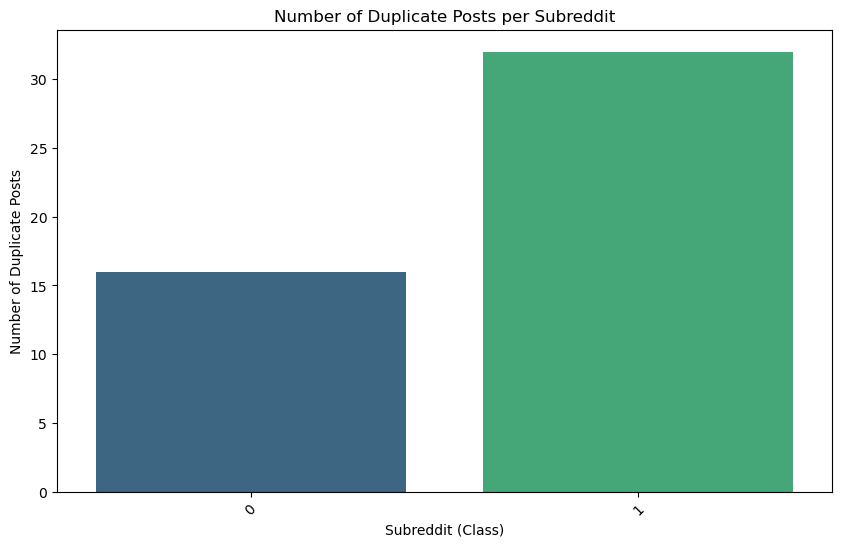

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count duplicates per class
dup_counts = duplicates.groupby('subreddit').size().reset_index(name='count')

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='subreddit', y='count', data=dup_counts, palette='viridis')
plt.title('Number of Duplicate Posts per Subreddit')
plt.xlabel('Subreddit (Class)')
plt.ylabel('Number of Duplicate Posts')
plt.xticks(rotation=45)
plt.show()


## 2.4. Duplicate Removal

In [23]:
# Duplicate analysis and removal
print("Total rows before duplicate removal:", len(df))
print("Number of duplicate posts (based on 'body'):", df['body'].duplicated().sum())

# Show duplicates per class
duplicates_per_class = df[df['body'].duplicated(keep=False)].groupby('subreddit').size()
print("\nDuplicates per subreddit:")
print(duplicates_per_class)

# Remove duplicates (keep first occurrence)
df_clean = df.drop_duplicates(subset='body', keep='first').copy()

print("\nTotal rows after removal:", len(df_clean))
print("Final class distribution:")
print(df_clean['subreddit'].value_counts())


Total rows before duplicate removal: 24000
Number of duplicate posts (based on 'body'): 24

Duplicates per subreddit:
subreddit
0    16
1    32
dtype: int64

Total rows after removal: 23976
Final class distribution:
subreddit
0    11992
1    11984
Name: count, dtype: int64


## 2.5. Final Class Distribution Summary

FINAL CLASS DISTRIBUTION (After Cleaning)
Total unique posts: 23976
ADHD posts (subreddit=1): 11984
OCD posts (subreddit=0): 11992
Dataset balance: 1.00:1


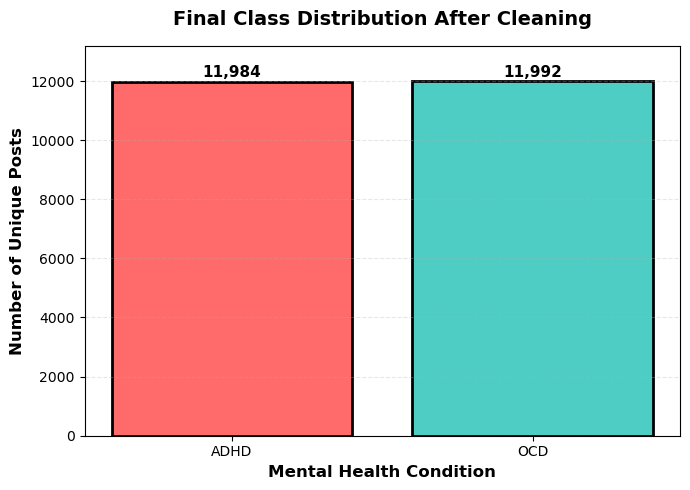

In [179]:

# Final Class Distribution

print("Final Class Distribution (After Cleaning)")

# Get final counts
adhd_final = len(df_clean[df_clean['subreddit'] ==1])
ocd_final = len(df_clean[df_clean['subreddit'] == 0])
total_final = len(df_clean)

# Print distribution
print(f"Total unique posts: {total_final}")
print(f"ADHD posts (subreddit=1): {adhd_final}")
print(f"OCD posts (subreddit=0): {ocd_final}")
print(f"Dataset balance: {adhd_final/ocd_final:.2f}:1")

# Final visualization
plt.figure(figsize=(7, 5))
colors = ['#FF6B6B', '#4ECDC4']
conditions = ['ADHD', 'OCD']
counts = [adhd_final, ocd_final]

bars = plt.bar(conditions, counts, color=colors, edgecolor='black', linewidth=2)

plt.title('Final Class Distribution After Cleaning', 
          fontsize=14, fontweight='bold', pad=15)
plt.xlabel('Mental Health Condition', fontsize=12, fontweight='bold')
plt.ylabel('Number of Unique Posts', fontsize=12, fontweight='bold')
plt.ylim(0, max(counts) * 1.1)

# Add count labels on top
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}',  # Format with commas for thousands
             ha='center', va='bottom', 
             fontsize=11, fontweight='bold')

plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

## 2.6. Text Length Analysis

        text_length    word_count
count  24000.000000  24000.000000
mean     254.567375     47.854792
std      313.339996     57.717743
min       51.000000      1.000000
25%       92.000000     18.000000
50%      157.000000     30.000000
75%      291.000000     55.000000
max     7790.000000   1415.000000


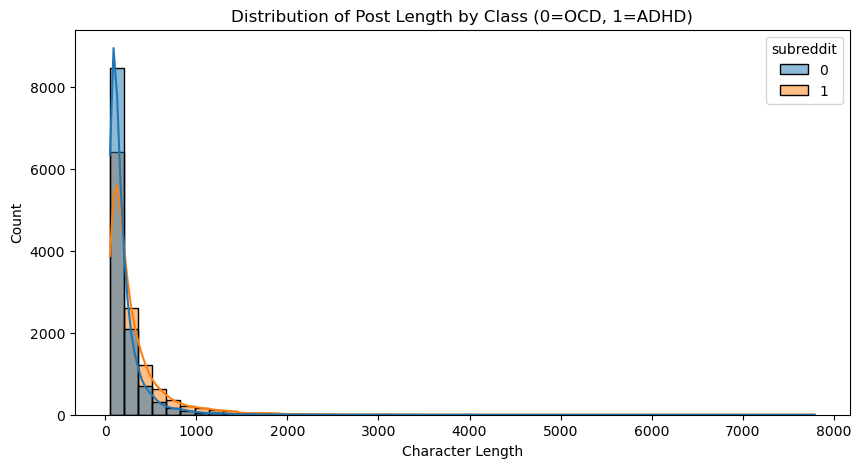

In [27]:
# Text length analysis
df['text_length'] = df['body'].apply(len)
df['word_count'] = df['body'].apply(lambda x: len(x.split()))

print(df[['text_length', 'word_count']].describe())

# Plot text length distribution
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='text_length', hue='subreddit', bins=50, kde=True)
plt.title('Distribution of Post Length by Class (0=OCD, 1=ADHD)')
plt.xlabel('Character Length')
plt.show()

# 3. Text Preprocessing

In [29]:
# Install emoji 
#!pip install emoji

## 3.1. Import NLP Libraries

In [31]:
import re
import emoji
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
# Download required NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## 3.2. Text Preprocessing Function

In [33]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Expanded negation list
negation_words = {
    "not", "no", "never", "none", "nobody", "nothing", "nowhere", 
    "neither", "nor", "hardly", "scarcely", "barely", "cannot"
}

def preprocess(text):
    if not isinstance(text, str) or not text.strip():
        return ""
    
    # Step 1: Lowercase
    text = text.lower()
    
    # Step 2: Expand contractions
    text = contractions.fix(text)
    
    # Step 3: Remove URLs and Reddit mentions
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'r/\w+|u/\w+', '', text)
    
    # Step 4: Remove emojis
    text = emoji.replace_emoji(text, replace='')
    
    # Step 5: Remove markdown / HTML entities
    text = re.sub(r'\[.*?\]|\(.*?\)', '', text)
    text = re.sub(r'&[a-z]+;', ' ', text)  # &amp;, &lt;, &gt;
    text = re.sub(r'\*{1,3}', '', text)  # bold/italic markers
    
    # Step 6: Remove unwanted characters (keep basic punctuation)
    text = re.sub(r'[^\w\s.,!?\'-]', ' ', text)
    
    # Step 7: Remove standalone numbers
    text = re.sub(r'\b\d+\b', ' ', text)
    
    # Step 8: Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Step 9: Tokenize
    tokens = text.split()
    
    # Step 10: Handle negations carefully
    processed_tokens = []
    i = 0
    while i < len(tokens):
        token = tokens[i]
        if token in negation_words and i + 1 < len(tokens):
            next_token = tokens[i + 1]
            # merge only if next token is a valid word
            if next_token.isalpha():
                processed_tokens.append(f"{token}_{next_token}")
                i += 2
                continue
        processed_tokens.append(token)
        i += 1
    
    # Step 11: Remove stopwords but keep negated tokens
    filtered_tokens = [t for t in processed_tokens if (t not in stop_words or '_' in t)]
    
    # Step 12: Remove very short non-negated words (<3)
    filtered_tokens = [t for t in filtered_tokens if len(t) > 2 or '_' in t]
    
    # Step 13: Lemmatize
    lemmatized_tokens = []
    for t in filtered_tokens:
        if '_' in t:
            neg, word = t.split('_', 1)
            lemmatized_word = lemmatizer.lemmatize(word)
            lemmatized_tokens.append(f"{neg}_{lemmatized_word}")
        else:
            lemmatized_tokens.append(lemmatizer.lemmatize(t))
    
    # Step 14: Join back
    result = ' '.join(lemmatized_tokens)
    return result


In [34]:
# Install contradictions 
#!pip install contractions


## 3.3. Apply Preprocessing

In [36]:
import contractions
# Apply the preprocessing function to text column
df_clean['clean_text'] = df_clean['body'].apply(preprocess)

# Check the first few cleaned posts
df_clean[['body', 'clean_text']].head(5)


,body,clean_text
0,Thank you.\n\nMy son was recently diagnosed an...,thank you. son recently diagnosed want whateve...
1,"Omg. Yes, I didn’t realize how close this was ...","omg. yes, not_realize close obsession-compulsi..."
2,I love how our positive way is to laugh of our...,love positive way laugh say fuck it. accept sh...
3,"I am really, really struggling with the sudden...","really, really struggling sudden change right...."
4,i was just unconciously procrastinating doing ...,unconciously procrastinating homework thank


In [37]:
# Rename 'clean_text' to 'cleaned_text' for consistency
df_clean.rename(columns={'clean_text': 'cleaned_text'}, inplace=True)


print(f"Columns in dataframe: {list(df_clean.columns)}")

Columns in dataframe: ['body', 'subreddit', 'cleaned_text']


## 3.4. Post-Preprocessing Analysis

In [39]:
print("TEXT ANALYSIS AFTER PREPROCESSING")
print("="*60)

# Calculate text statistics
df_clean['word_count'] = df_clean['cleaned_text'].apply(lambda x: len(str(x).split()))
df_clean['char_count'] = df_clean['cleaned_text'].apply(len)

print("OVERALL STATISTICS:")
print(f"Total posts: {len(df_clean):,}")
print(f"Average words per post: {df_clean['word_count'].mean():.1f}")
print(f"Average characters per post: {df_clean['char_count'].mean():.1f}")
print(f"Minimum words: {df_clean['word_count'].min()}")
print(f"Maximum words: {df_clean['word_count'].max()}")

print("BY CONDITION:")
for label, name in [(1, 'ADHD'), (0, 'OCD')]:
    subset = df_clean[df_clean['subreddit'] == label]
    print(f"\n{name}:")
    print(f" Posts: {len(subset):,}")
    print(f" Avg words: {subset['word_count'].mean():.1f}")
    print(f" Min words: {subset['word_count'].min()}")
    print(f" Max words: {subset['word_count'].max()}")


TEXT ANALYSIS AFTER PREPROCESSING
OVERALL STATISTICS:
Total posts: 23,976
Average words per post: 22.3
Average characters per post: 154.0
Minimum words: 0
Maximum words: 645
BY CONDITION:

ADHD:
 Posts: 11,984
 Avg words: 26.7
 Min words: 0
 Max words: 645

OCD:
 Posts: 11,992
 Avg words: 18.0
 Min words: 0
 Max words: 588


## 3.5. Negation Analysis

In [41]:
# Negation analysis av
negation_count = df_clean['cleaned_text'].str.contains('_').sum()
print(f"NEGATION PRESERVATION:")
print(f"Posts containing negations: {negation_count}")
print(f"Percentage: {negation_count/len(df_clean)*100:.1f}%")

# Check for common negations
if negation_count > 0:
    all_words = ' '.join(df_clean['cleaned_text']).split()
    negation_words = [word for word in all_words if '_' in word]
    from collections import Counter
    common_negs = Counter(negation_words).most_common(10)
    print(f"TOP 10 MOST COMMON NEGATIONS:")
    for neg, count in common_negs:
        print(f" {neg}: {count} times")



NEGATION PRESERVATION:
Posts containing negations: 11552
Percentage: 48.2%
TOP 10 MOST COMMON NEGATIONS:
 not_have: 895 times
 not_know: 865 times
 not_even: 487 times
 not_want: 418 times
 not_a: 384 times
 not_get: 331 times
 not_be: 326 times
 not_the: 296 times
 not_do: 275 times
 not_think: 244 times


## 3.6. Word Count Visualization

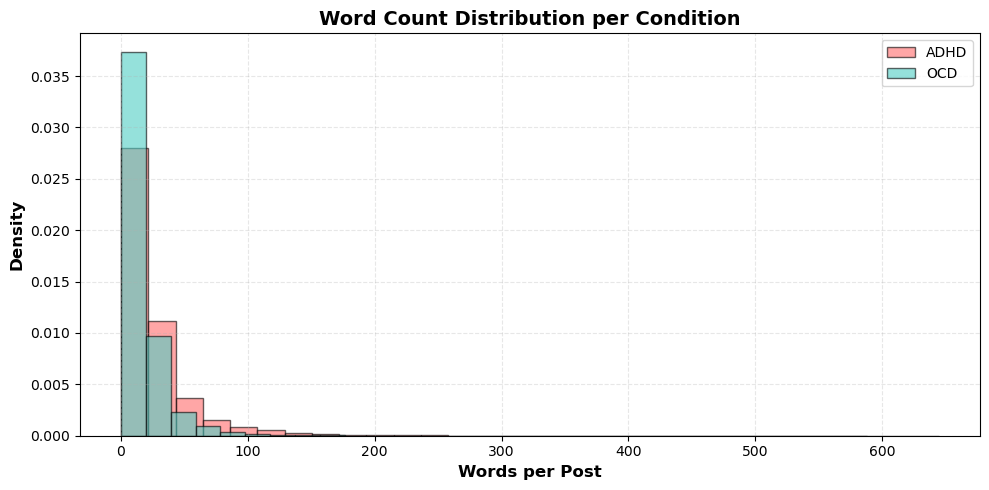

In [43]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Colors for classes
colors = {'ADHD': '#FF6B6B', 'OCD': '#4ECDC4'}

plt.figure(figsize=(10, 5))

# Histogram: Word count distribution per class
for label, name in [(1, 'ADHD'), (0, 'OCD')]:
    subset = df_clean[df_clean['subreddit'] == label]
    plt.hist(subset['word_count'], bins=30, alpha=0.6, 
             label=name, color=colors[name], edgecolor='black', density=True)

plt.title('Word Count Distribution per Condition', fontsize=14, fontweight='bold')
plt.xlabel('Words per Post', fontsize=12, fontweight='bold')
plt.ylabel('Density', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# 4. Feature Engineering and Model Training

## 4.1. Train-Test Split

In [46]:
from sklearn.model_selection import train_test_split

# Features: cleaned text
X = df_clean['cleaned_text']

# Labels: subreddit (1=ADHD, 0=OCD)
y = df_clean['subreddit']

# Split into train and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 19180, Testing samples: 4796


## 4.2. TF-IDF Vectorization (Baseline)

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    ngram_range=(1,2),  # Unigrams + bigrams
    stop_words=None     # Already removed stopwords in preprocessing
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF feature shape:")
print(X_train_tfidf.shape)


TF-IDF feature shape:
(19180, 5000)


# 5. Baseline Models

## Learning Curve Function

In [51]:
from sklearn.model_selection import learning_curve as sk_learning_curve  

def plot_learning_curve(model, X, y, model_name="Model"):  
    """
    Simple learning curve function
    """
    # Calculate learning curve - use sk_learning_curve
    train_sizes, train_scores, val_scores = sk_learning_curve(
        model, X, y, cv=5, n_jobs=-1, 
        train_sizes=np.linspace(0.1, 1.0, 5),  
        scoring='accuracy', random_state=42
    )
    
    # Calculate means
    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    
    # Create plot
    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_mean, 'o-', color='blue', linewidth=2, markersize=8, label='Training Score')
    plt.plot(train_sizes, val_mean, 's-', color='green', linewidth=2, markersize=8, label='Validation Score')
    
    # Style
    plt.fill_between(train_sizes, train_mean - np.std(train_scores, axis=1), 
                     train_mean + np.std(train_scores, axis=1), alpha=0.1, color='blue')
    plt.fill_between(train_sizes, val_mean - np.std(val_scores, axis=1), 
                     val_mean + np.std(val_scores, axis=1), alpha=0.1, color='green')
    
    plt.title(f'Learning Curve - {model_name}', fontsize=14, fontweight='bold')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    
    # Calculate and show gap
    gap = train_mean[-1] - val_mean[-1]
    plt.text(0.02, 0.95, f'Final Gap: {gap:.3f}', transform=plt.gca().transAxes,
             fontsize=11, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
    
    plt.tight_layout()
    plt.show()
    
    # Print simple analysis
    print(f"\nLearning Curve Analysis for {model_name}:")
    print(f"  Training Accuracy: {train_mean[-1]:.3f}")
    print(f"  Validation Accuracy: {val_mean[-1]:.3f}")
    print(f"  Gap: {gap:.3f}")
    
    if gap > 0.1:
        print("Overfitting detected!")
    elif gap < 0.02:
        print("Good generalization!")
    else:
        print("Some overfitting")
    
    return gap

## 5.1. Naïve Bayes Classifier

Learning Curve Analysis of Naïve Bayes


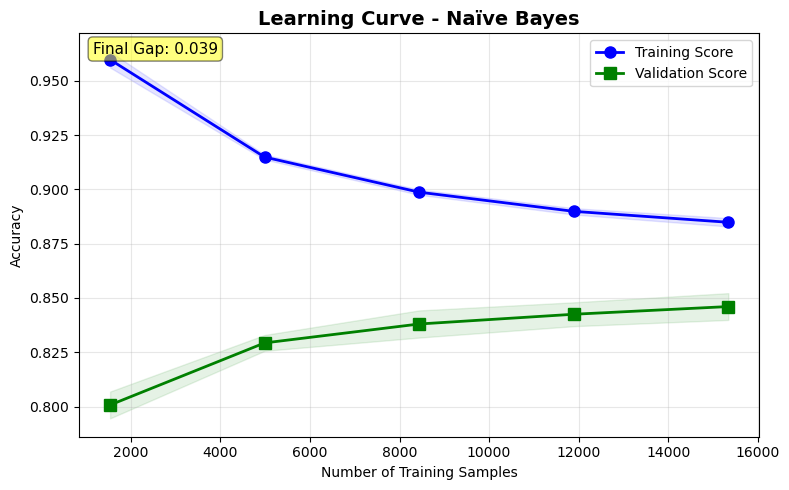


Learning Curve Analysis for Naïve Bayes:
  Training Accuracy: 0.885
  Validation Accuracy: 0.846
  Gap: 0.039
Some overfitting
Naïve Bayes Accuracy: 83.99%

              precision    recall  f1-score   support

        ADHD       0.84      0.84      0.84      2399
         OCD       0.84      0.84      0.84      2397

    accuracy                           0.84      4796
   macro avg       0.84      0.84      0.84      4796
weighted avg       0.84      0.84      0.84      4796



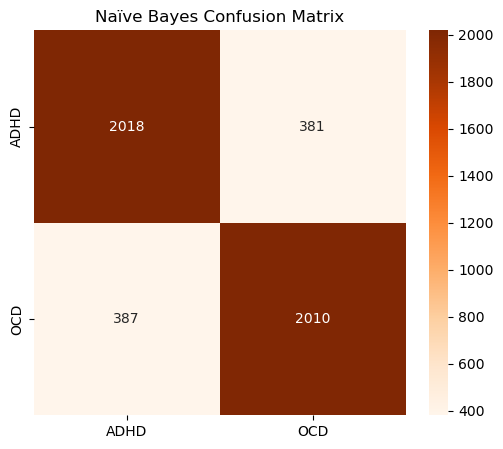

In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Train Naïve Bayes
nb_model = MultinomialNB(alpha=1.0)
nb_model.fit(X_train_tfidf, y_train)

# Learning curve
print("Learning Curve Analysis of Naïve Bayes")
print("="*60)
gap_nb = plot_learning_curve(nb_model, X_train_tfidf, y_train, "Naïve Bayes")
print("="*60)
# Predict
y_pred_nb = nb_model.predict(X_test_tfidf)

# Accuracy
acc_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Accuracy: {acc_nb*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_nb, target_names=['ADHD','OCD']))

# Confusion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Naïve Bayes Confusion Matrix')
plt.show()


## 5.2. Logistic Regression

Learning Curve Analysis of Baseline Logistic Regression


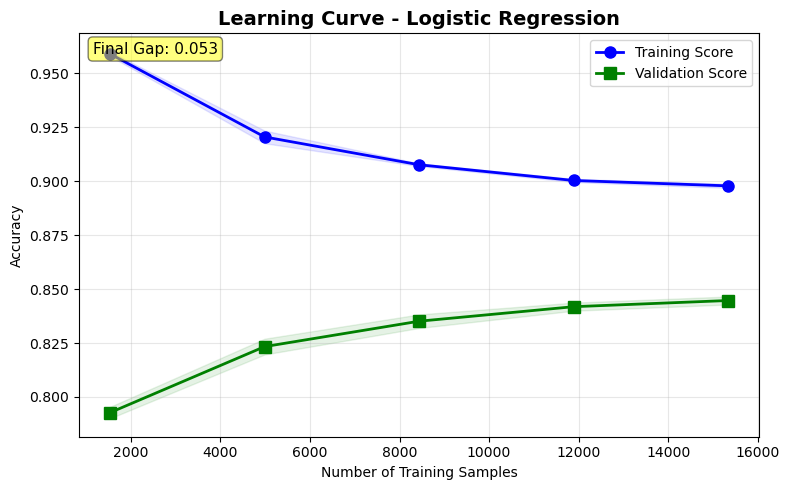


Learning Curve Analysis for Logistic Regression:
  Training Accuracy: 0.898
  Validation Accuracy: 0.845
  Gap: 0.053
Some overfitting
Logistic Regression Accuracy: 84.57%

              precision    recall  f1-score   support

        ADHD       0.85      0.83      0.84      2399
         OCD       0.84      0.86      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



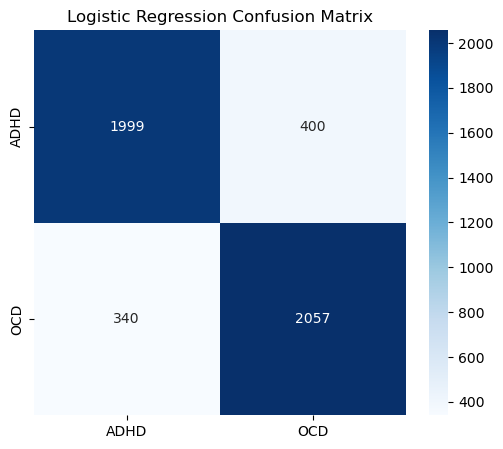

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
# Learning curve
print("Learning Curve Analysis of Baseline Logistic Regression")
print("="*60)
gap_lr = plot_learning_curve(lr_model, X_train_tfidf, y_train, "Logistic Regression")
print("="*60)
# Predict
y_pred_lr = lr_model.predict(X_test_tfidf)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {acc_lr*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_lr, target_names=['ADHD','OCD']))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Logistic Regression Confusion Matrix')
plt.show()


## 5.3. Linear Support Vector Machine (SVM)

Learning Curve Analysis of Baseline SVM


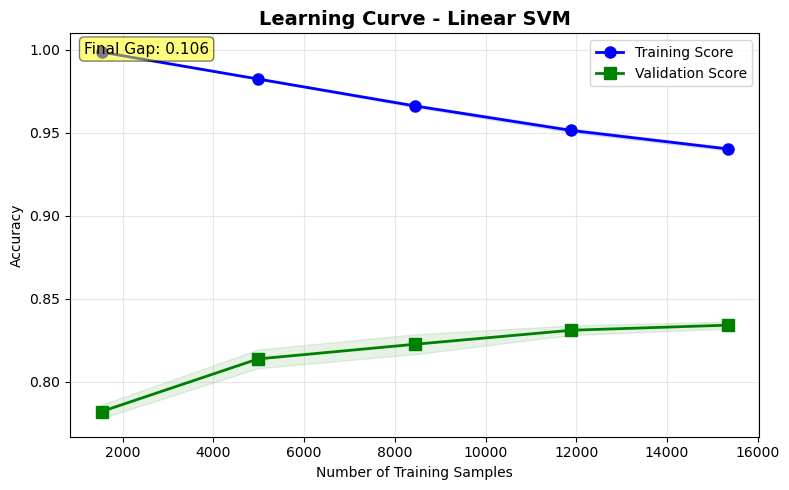


Learning Curve Analysis for Linear SVM:
  Training Accuracy: 0.940
  Validation Accuracy: 0.834
  Gap: 0.106
Overfitting detected!
Linear SVM Accuracy: 83.34%

              precision    recall  f1-score   support

        ADHD       0.84      0.83      0.83      2399
         OCD       0.83      0.84      0.83      2397

    accuracy                           0.83      4796
   macro avg       0.83      0.83      0.83      4796
weighted avg       0.83      0.83      0.83      4796



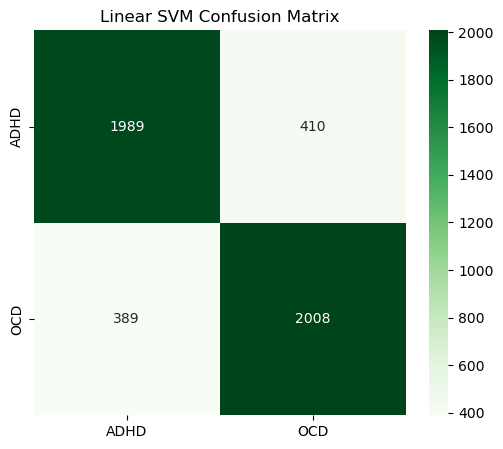

In [57]:
from sklearn.svm import LinearSVC

# Train Linear SVM
svm_model = LinearSVC(max_iter=1000, random_state=42)
svm_model.fit(X_train_tfidf, y_train)
# Learning curve
print("Learning Curve Analysis of Baseline SVM")
print("="*60)
gap_svm = plot_learning_curve(svm_model, X_train_tfidf, y_train, "Linear SVM")
print("="*60)
# Predict
y_pred_svm = svm_model.predict(X_test_tfidf)

# Accuracy
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"Linear SVM Accuracy: {acc_svm*100:.2f}%\n")

# Classification report
print(classification_report(y_test, y_pred_svm, target_names=['ADHD','OCD']))

# Confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Linear SVM Confusion Matrix')
plt.show()


## 5.4. Model Comparison Visualization

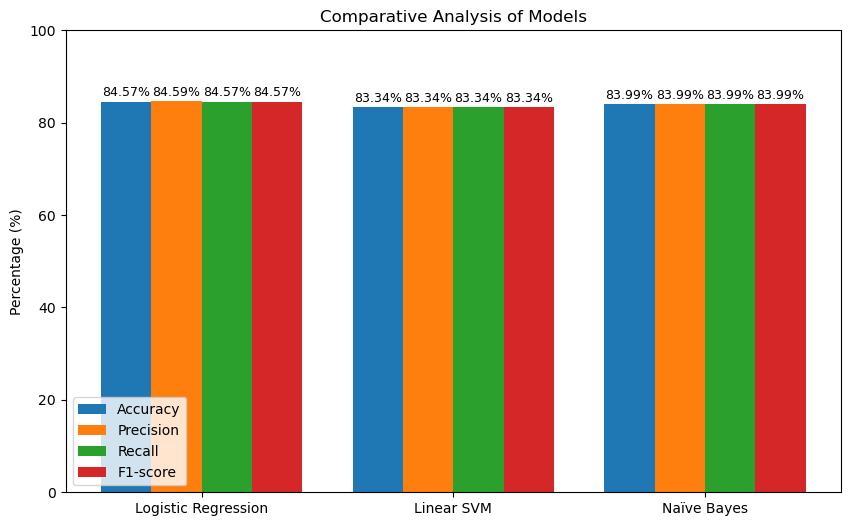

In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def get_metrics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return acc*100, prec*100, rec*100, f1*100

metrics_lr = get_metrics(y_test, y_pred_lr)
metrics_svm = get_metrics(y_test, y_pred_svm)
metrics_nb = get_metrics(y_test, y_pred_nb)

models = ['Logistic Regression', 'Linear SVM', 'Naïve Bayes']
metrics = np.array([metrics_lr, metrics_svm, metrics_nb])
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']

# Plot
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(10,6))
for i in range(4):
    plt.bar(x + i*width - 1.5*width, metrics[:,i], width, label=labels[i])

# Add percentage values on top
for i in range(len(models)):
    for j in range(4):
        plt.text(x[i] + j*width - 1.5*width, metrics[i,j] + 0.5, f'{metrics[i,j]:.2f}%', 
                 ha='center', va='bottom', fontsize=9)

plt.xticks(x, models)
plt.ylim(0, 100)
plt.ylabel('Percentage (%)')
plt.title('Comparative Analysis of Models')
plt.legend()
plt.show()


# 6. Model Optimization

## 6.1. Enhanced TF-IDF Vectorization

In [99]:
# trying to imporve accuracy 
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(
    max_features=10000,  # Limit vocabulary size
    ngram_range=(1,3),  # Unigrams + bigrams
    min_df=5,    # Ignore words that appear in fewer than 5 documents
    max_df=0.9   # Ignore words that appear in >90% of documents

)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
print("TF-IDF feature shape:")
print(X_train_tfidf.shape)


TF-IDF feature shape:
(19180, 10000)


## 6.2. Hyperparameter Tuning with Grid Search

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Logistic Regression
grid_lr = GridSearchCV(
    LogisticRegression(max_iter=2000, random_state=42), 
    {'C': [0.01, 0.1, 1, 5, 10]}, 
    cv=5, 
    scoring='accuracy',
    return_train_score=True
)
grid_lr.fit(X_train_tfidf, y_train)
print(f"Best LR params: {grid_lr.best_params_}")
best_lr = grid_lr.best_estimator_

# Linear SVM
grid_svm = GridSearchCV(
    LinearSVC(max_iter=2000, random_state=42, dual='auto'),
    {'C': [0.01, 0.1, 1, 5, 10]},
    cv=5,
    scoring='accuracy',
    return_train_score=True
)
grid_svm.fit(X_train_tfidf, y_train)
print(f"Best SVM params: {grid_svm.best_params_}")
best_svm = grid_svm.best_estimator_

# Naïve Bayes
grid_nb = GridSearchCV(
    MultinomialNB(),
    {'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]},
    cv=5,
    scoring='accuracy',
    return_train_score=True
)
grid_nb.fit(X_train_tfidf, y_train)
print(f"Best NB params: {grid_nb.best_params_}")
best_nb = grid_nb.best_estimator_



Best LR params: {'C': 1}
Best SVM params: {'C': 0.1}
Best NB params: {'alpha': 1.5}


Fitting models explicitly...

Evaluating Optimized Logistic Regression


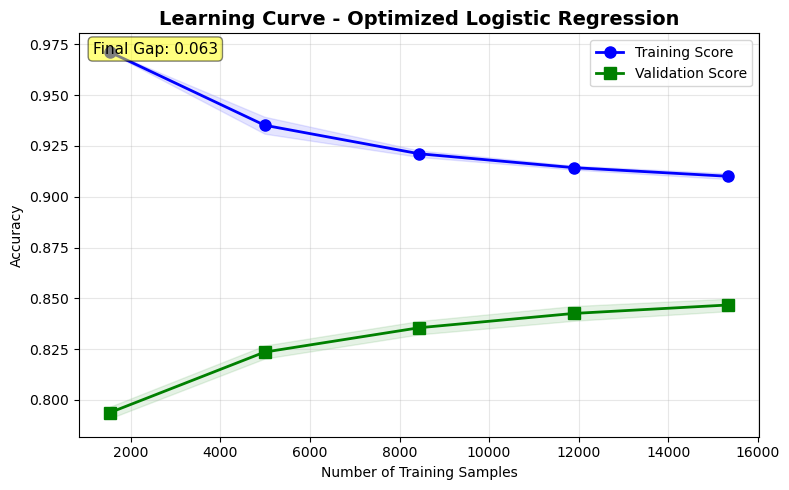


Learning Curve Analysis for Optimized Logistic Regression:
  Training Accuracy: 0.910
  Validation Accuracy: 0.847
  Gap: 0.063
Some overfitting
Optimized Logistic Regression Accuracy: 84.84%
  Improvement over baseline: 0.27%

Evaluating Optimized SVM


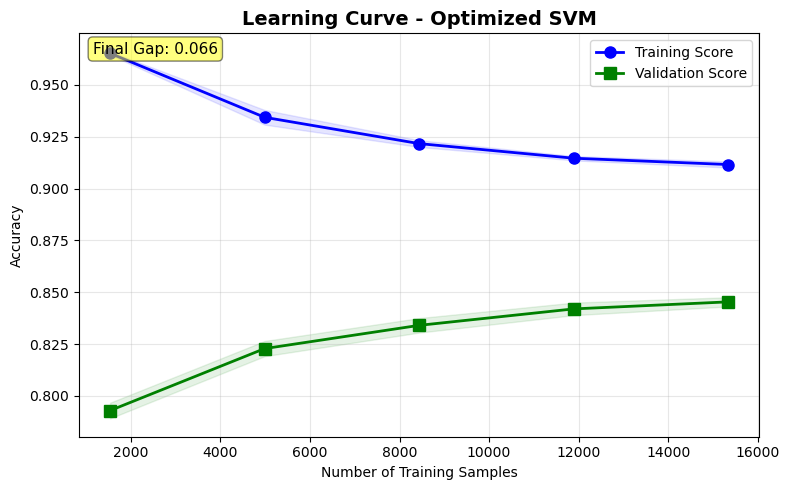


Learning Curve Analysis for Optimized SVM:
  Training Accuracy: 0.912
  Validation Accuracy: 0.845
  Gap: 0.066
Some overfitting
Optimized SVM Accuracy: 84.82%
  Improvement over baseline: 1.48%

Evaluating Optimized Naïve Bayes


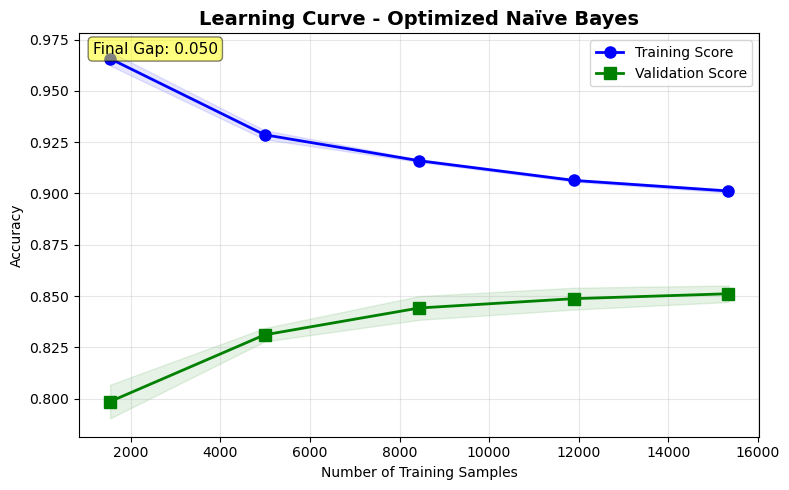


Learning Curve Analysis for Optimized Naïve Bayes:
  Training Accuracy: 0.901
  Validation Accuracy: 0.851
  Gap: 0.050
Some overfitting
Optimized Naïve Bayes Accuracy: 84.67%
  Improvement over baseline: 0.68%


## 6.3. Optimized Model Evaluation


Optimized Naïve Bayes Classification Report:
              precision    recall  f1-score   support

        ADHD       0.85      0.84      0.85      2399
         OCD       0.84      0.85      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



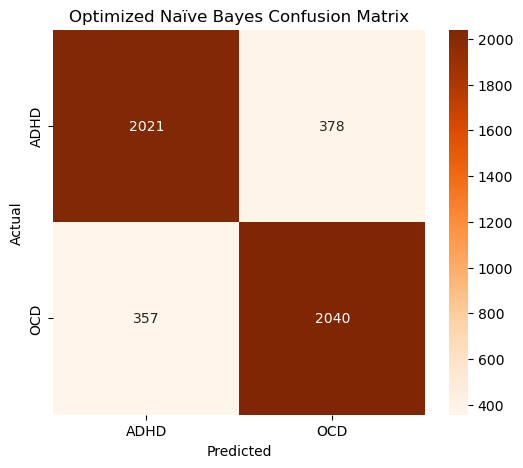


Optimized Logistic Regression Classification Report:
              precision    recall  f1-score   support

        ADHD       0.86      0.84      0.85      2399
         OCD       0.84      0.86      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



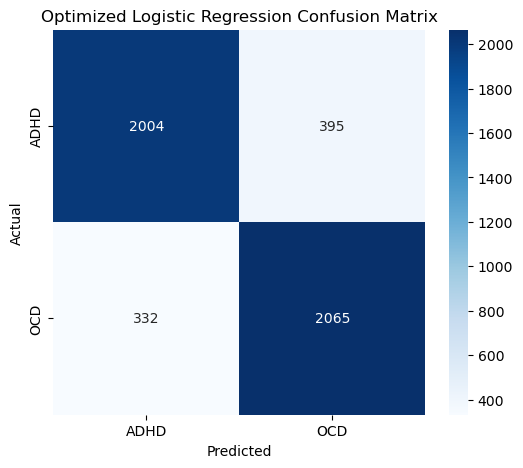


Optimized SVM Classification Report:
              precision    recall  f1-score   support

        ADHD       0.86      0.83      0.85      2399
         OCD       0.84      0.86      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



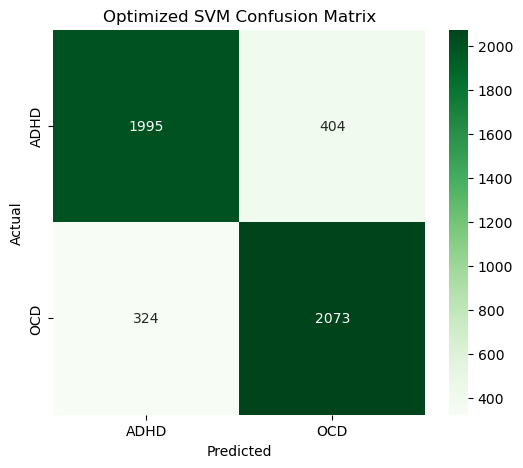

In [171]:
# After Optimized Naïve Bayes 
print("\nOptimized Naïve Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb_opt, target_names=['ADHD', 'OCD']))

cm_nb_opt = confusion_matrix(y_test, y_pred_nb_opt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb_opt, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Optimized Naïve Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# After Optimized Logistic Regression 
print("\nOptimized Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr_opt, target_names=['ADHD', 'OCD']))

cm_lr_opt = confusion_matrix(y_test, y_pred_lr_opt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_lr_opt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Optimized Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# After Optimized SVM 
print("\nOptimized SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_opt, target_names=['ADHD', 'OCD']))

cm_svm_opt = confusion_matrix(y_test, y_pred_svm_opt)
plt.figure(figsize=(6,5))
sns.heatmap(cm_svm_opt, annot=True, fmt='d', cmap='Greens',
            xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Optimized SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. Ensemble Methods

## 7.1. Hard Voting Ensemble

Learning Curve Analysis of Hard Voting Ensemble


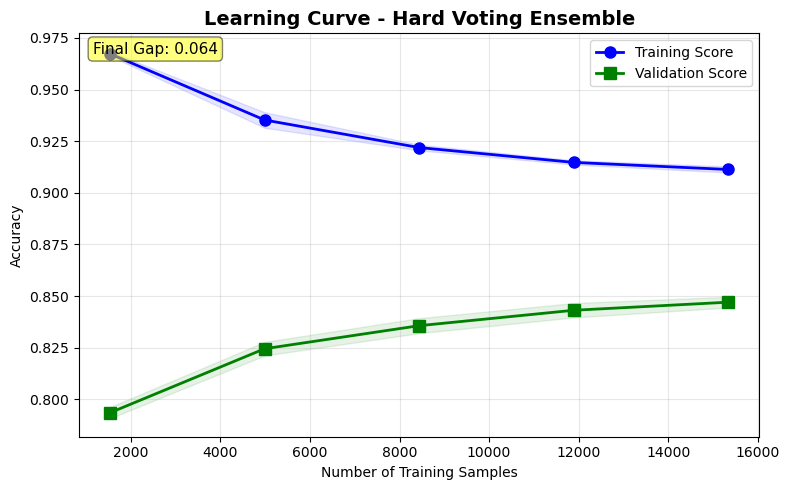


Learning Curve Analysis for Hard Voting Ensemble:
  Training Accuracy: 0.911
  Validation Accuracy: 0.847
  Gap: 0.064
Some overfitting
Ensemble Accuracy (Hard Voting): 85.05%

Hard Voting Classification Report:

              precision    recall  f1-score   support

        ADHD       0.86      0.84      0.85      2399
         OCD       0.84      0.87      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



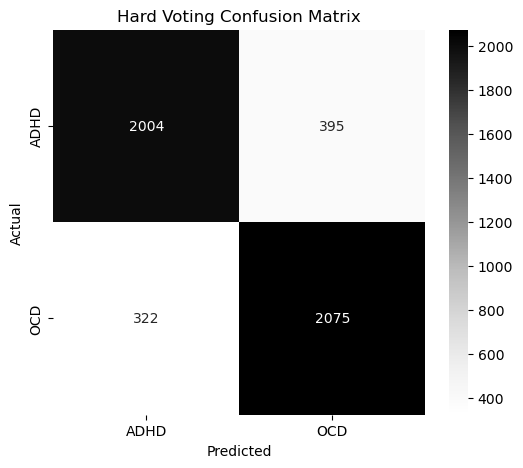

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# HARD VOTING
hard_ensemble = VotingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm),
        ('nb', best_nb)
    ],
    voting='hard'
)

hard_ensemble.fit(X_train_tfidf, y_train)
print("Learning Curve Analysis of Hard Voting Ensemble")
print("="*60)
gap_hard = plot_learning_curve(hard_ensemble, X_train_tfidf, y_train, "Hard Voting Ensemble")
print("="*60)
y_pred_hard = hard_ensemble.predict(X_test_tfidf)

acc_hard_voting = accuracy_score(y_test, y_pred_hard)
print(f'Ensemble Accuracy (Hard Voting): {acc_hard_voting*100:.2f}%\n')

print("Hard Voting Classification Report:\n")
print(classification_report(y_test, y_pred_hard, target_names=['ADHD','OCD']))

cm_hard = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(6,5))
sns.heatmap(cm_hard, annot=True, fmt='d', cmap='Greys',
            xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Hard Voting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## 7.2. Soft Voting Ensemble

Learning Curve Analysis of Soft Voting Ensemble


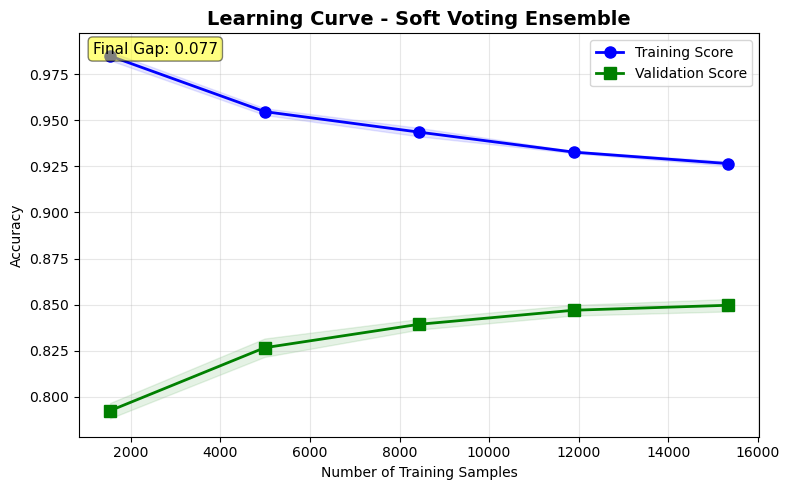


Learning Curve Analysis for Soft Voting Ensemble:
  Training Accuracy: 0.927
  Validation Accuracy: 0.850
  Gap: 0.077
Some overfitting
Ensemble Accuracy (Soft Voting): 85.13%

Soft Voting Classification Report:

              precision    recall  f1-score   support

        ADHD       0.86      0.84      0.85      2399
         OCD       0.85      0.86      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



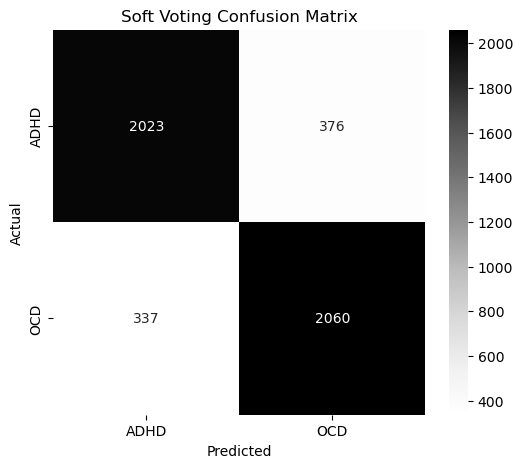

In [85]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Models
lr_model = LogisticRegression(max_iter=2000, C=1, random_state=42)
svm_model = SVC(kernel='linear', probability=True, C=1, random_state=42)  # probability=True
nb_model = MultinomialNB(alpha=1.0)

# Soft Voting
soft_ensemble = VotingClassifier(
    estimators=[
        ('lr', lr_model),
        ('svm', svm_model),   # SVC with probability=True
        ('nb', nb_model)
    ],
    voting='soft'
)

soft_ensemble.fit(X_train_tfidf, y_train)
# Learning Curve 
print("Learning Curve Analysis of Soft Voting Ensemble")
print("="*60)
gap_soft = plot_learning_curve(soft_ensemble, X_train_tfidf, y_train, "Soft Voting Ensemble")
print("="*60)
y_pred_soft= soft_ensemble.predict(X_test_tfidf)

acc_soft_voting = accuracy_score(y_test, y_pred_soft)
print(f'Ensemble Accuracy (Soft Voting): {acc_soft_voting*100:.2f}%\n')

print("Soft Voting Classification Report:\n")
print(classification_report(y_test, y_pred_soft, target_names=['ADHD','OCD']))

cm_soft = confusion_matrix(y_test, y_pred_soft)
plt.figure(figsize=(6,5))
sns.heatmap(cm_soft, annot=True, fmt='d', cmap='Greys',
            xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.title('Soft Voting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## 7.3. Stacking Ensemble

Learning Curve Analysis of Stacking Ensemble


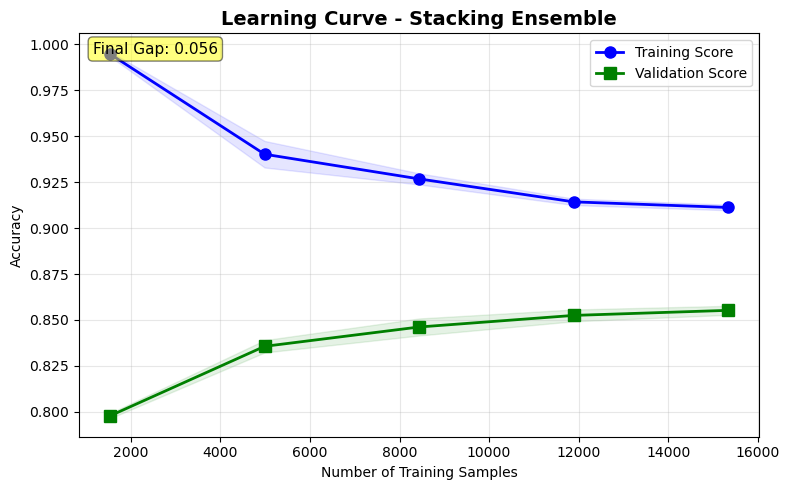


Learning Curve Analysis for Stacking Ensemble:
  Training Accuracy: 0.911
  Validation Accuracy: 0.855
  Gap: 0.056
Some overfitting
Stacking Ensemble Accuracy: 85.40%

Classification Report:

              precision    recall  f1-score   support

        ADHD       0.85      0.86      0.85      2399
         OCD       0.86      0.85      0.85      2397

    accuracy                           0.85      4796
   macro avg       0.85      0.85      0.85      4796
weighted avg       0.85      0.85      0.85      4796



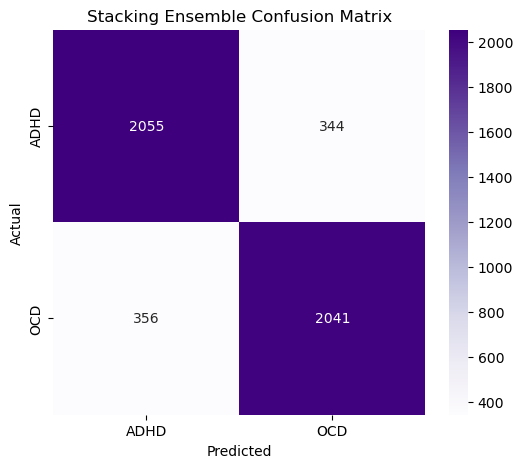

In [87]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Base Models
# Logistic Regression (already tuned)
best_lr = LogisticRegression(C=1, max_iter=2000, random_state=42)

# Linear SVM (wrap in CalibratedClassifierCV for probabilities)
best_svm = LinearSVC(max_iter=1000, random_state=42)
best_svm_cal = CalibratedClassifierCV(best_svm)  # wraps SVM
best_svm_cal.fit(X_train_tfidf, y_train)

# Naive Bayes
best_nb = MultinomialNB(alpha=1.0)
best_nb.fit(X_train_tfidf, y_train)

# Fit LR separately
best_lr.fit(X_train_tfidf, y_train)

# Stacking Ensemble
stacking = StackingClassifier(
    estimators=[
        ('lr', best_lr),
        ('svm', best_svm_cal),
        ('nb', best_nb)
    ],
    final_estimator=LogisticRegression(),
    cv=5
)

stacking.fit(X_train_tfidf, y_train)
# Learning Curve 
print("Learning Curve Analysis of Stacking Ensemble")
print("="*60)
gap_stack = plot_learning_curve(stacking, X_train_tfidf, y_train, "Stacking Ensemble")
print("="*60)
# Predictions & Evaluation
y_pred_stack = stacking.predict(X_test_tfidf)
acc_stack = accuracy_score(y_test, y_pred_stack)
print(f'Stacking Ensemble Accuracy: {acc_stack*100:.2f}%\n')

print("Classification Report:\n")
print(classification_report(y_test, y_pred_stack, target_names=['ADHD', 'OCD']))

# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_pred_stack)
plt.figure(figsize=(6,5))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Purples', xticklabels=['ADHD','OCD'], yticklabels=['ADHD','OCD'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Stacking Ensemble Confusion Matrix')
plt.show()


## 7.4. Comparative Analysis

In [109]:
# Comparative Analysis
print("\n" + "="*70)
print("Comparative Analysis")
print("="*70)

# 1. Baseline Results
print("\n1. Baseline Models (Original 5000 features):")
print(f"   Naïve Bayes:     {acc_nb*100:.2f}%")
print(f"   Logistic Reg:    {acc_lr*100:.2f}%")
print(f"   SVM:             {acc_svm*100:.2f}%")

# 2. Get Optimized individual model predictions
print("\n2. Optimized Individual Models (10000 features + GridSearch):")
# These are the models we got from GridSearch
y_pred_lr_opt = best_lr.predict(X_test_tfidf)  # 10000 features version
acc_lr_opt = accuracy_score(y_test, y_pred_lr_opt)

y_pred_svm_opt = best_svm.predict(X_test_tfidf)
acc_svm_opt = accuracy_score(y_test, y_pred_svm_opt)

y_pred_nb_opt = best_nb.predict(X_test_tfidf)
acc_nb_opt = accuracy_score(y_test, y_pred_nb_opt)

print(f"   Naïve Bayes:     {acc_nb_opt*100:.2f}%")
print(f"   Logistic Reg:    {acc_lr_opt*100:.2f}%")
print(f"   SVM:             {acc_svm_opt*100:.2f}%")

# 3. Ensemble Results
print("\n3. Ensemble Methods:")
print(f"   Hard Voting:     {acc_hard_voting*100:.2f}%")  
print(f"   Soft Voting:     {acc_soft_voting*100:.2f}%")  
print(f"   Stacking:        {acc_stack*100:.2f}%")  



Comparative Analysis

1. Baseline Models (Original 5000 features):
   Naïve Bayes:     83.99%
   Logistic Reg:    84.57%
   SVM:             83.34%

2. Optimized Individual Models (10000 features + GridSearch):
   Naïve Bayes:     84.67%
   Logistic Reg:    84.84%
   SVM:             84.82%

3. Ensemble Methods:
   Hard Voting:     85.05%
   Soft Voting:     85.13%
   Stacking:        85.40%


## 7.5. Visualization: Baseline vs Optimized

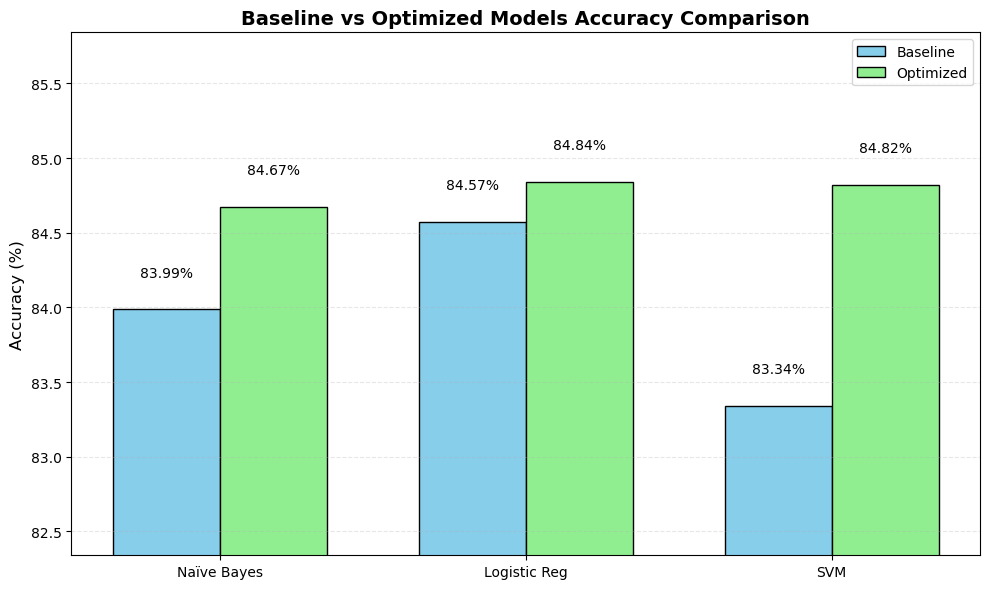

In [111]:
import matplotlib.pyplot as plt
import numpy as np

# Models
models = ['Naïve Bayes', 'Logistic Reg', 'SVM']

# Accuracy values
baseline_scores = [acc_nb*100, acc_lr*100, acc_svm*100]
optimized_scores = [acc_nb_opt*100, acc_lr_opt*100, acc_svm_opt*100]

# Bar positions
x = np.arange(len(models))
width = 0.35  # width of each bar

# Create figure
plt.figure(figsize=(10,6))

# Plot bars
plt.bar(x - width/2, baseline_scores, width, color='skyblue', edgecolor='black', label='Baseline')
plt.bar(x + width/2, optimized_scores, width, color='lightgreen', edgecolor='black', label='Optimized')

# Add labels and title
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(min(baseline_scores)-1, max(optimized_scores)+1)  # auto adjust to range
plt.title('Baseline vs Optimized Models Accuracy Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, models)
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.legend()

# Annotate values on top of bars
for i in range(len(models)):
    plt.text(x[i] - width/2, baseline_scores[i] + 0.2, f'{baseline_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    plt.text(x[i] + width/2, optimized_scores[i] + 0.2, f'{optimized_scores[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## 7.6. Final Performance Summary

In [114]:
# Final Model Performance Summary

print("\n" + "="*70)
print("Final Model Performance")
print("="*70)

summary_data = {
    'Model': ['Naïve Bayes (Baseline)', 'Logistic Reg (Baseline)', 'SVM (Baseline)',
              'Naïve Bayes (Optimized)', 'Logistic Reg (Optimized)', 'SVM (Optimized)',
              'Hard Voting Ensemble', 'Soft Voting Ensemble', 'Stacking Ensemble'],
    'Accuracy (%)': [round(acc_nb*100, 2), round(acc_lr*100, 2), round(acc_svm*100, 2),
                     round(acc_nb_opt*100, 2), round(acc_lr_opt*100, 2), round(acc_svm_opt*100, 2),
                     round(acc_hard_voting*100, 2), round(acc_soft_voting*100, 2), round(acc_stack*100, 2)],
    'TF-IDF Features': [5000, 5000, 5000, 10000, 10000, 10000, 10000, 10000, 10000],  # added last value
    'Parameters': ['Default', 'Default', 'Default', 
                   'GridSearch', 'GridSearch', 'GridSearch',
                   'Ensemble', 'Ensemble', 'Ensemble']
}


summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# Rank by accuracy
print("\n" + "-"*70)
print("Ranking Accuracy:")
print("-"*70)

ranked_df = summary_df.sort_values('Accuracy (%)', ascending=False)
for i, (_, row) in enumerate(ranked_df.iterrows(), 1):
    print(f"{i}. {row['Model']:25} {row['Accuracy (%)']:.2f}%")

print("\n" + "="*70)
print("Key Findings:")
print("="*70)
print(f"1. Best Individual Model: {ranked_df.iloc[0]['Model']} ({ranked_df.iloc[0]['Accuracy (%)']:.2f}%)")

# Calculate improvements
lr_improvement = acc_lr_opt*100 - acc_lr*100
print(f"2. Optimization improved Logistic Regression by {lr_improvement:+.2f}%")

svm_improvement = acc_svm_opt*100 - acc_svm*100
print(f"3. Optimization improved SVM by {svm_improvement:+.2f}%")

nb_improvement = acc_nb_opt*100 - acc_nb*100
print(f"4. Optimization improved Naïve Bayes by {nb_improvement:+.2f}%")

stacking_improvement = acc_stack*100 - acc_lr*100
print(f"5. Stacking Ensemble is {stacking_improvement:+.2f}% better than baseline Logistic Regression")

# Find which model improved the most
improvements = {
    'Logistic Regression': lr_improvement,
    'SVM': svm_improvement,
    'Naïve Bayes': nb_improvement
}
most_improved = max(improvements, key=improvements.get)
print(f"6. Most improved with optimization: {most_improved} ({improvements[most_improved]:+.2f}%)")



Final Model Performance

                    Model  Accuracy (%)  TF-IDF Features Parameters
  Naïve Bayes (Baseline)         83.99             5000    Default
 Logistic Reg (Baseline)         84.57             5000    Default
          SVM (Baseline)         83.34             5000    Default
 Naïve Bayes (Optimized)         84.67            10000 GridSearch
Logistic Reg (Optimized)         84.84            10000 GridSearch
         SVM (Optimized)         84.82            10000 GridSearch
    Hard Voting Ensemble         85.05            10000   Ensemble
    Soft Voting Ensemble         85.13            10000   Ensemble
       Stacking Ensemble         85.40            10000   Ensemble

----------------------------------------------------------------------
Ranking Accuracy:
----------------------------------------------------------------------
1. Stacking Ensemble         85.40%
2. Soft Voting Ensemble      85.13%
3. Hard Voting Ensemble      85.05%
4. Logistic Reg (Optimized)  84.84

# 8. Comprehensive Model Evaluation

## 8.1. Multi-Metric Comparison

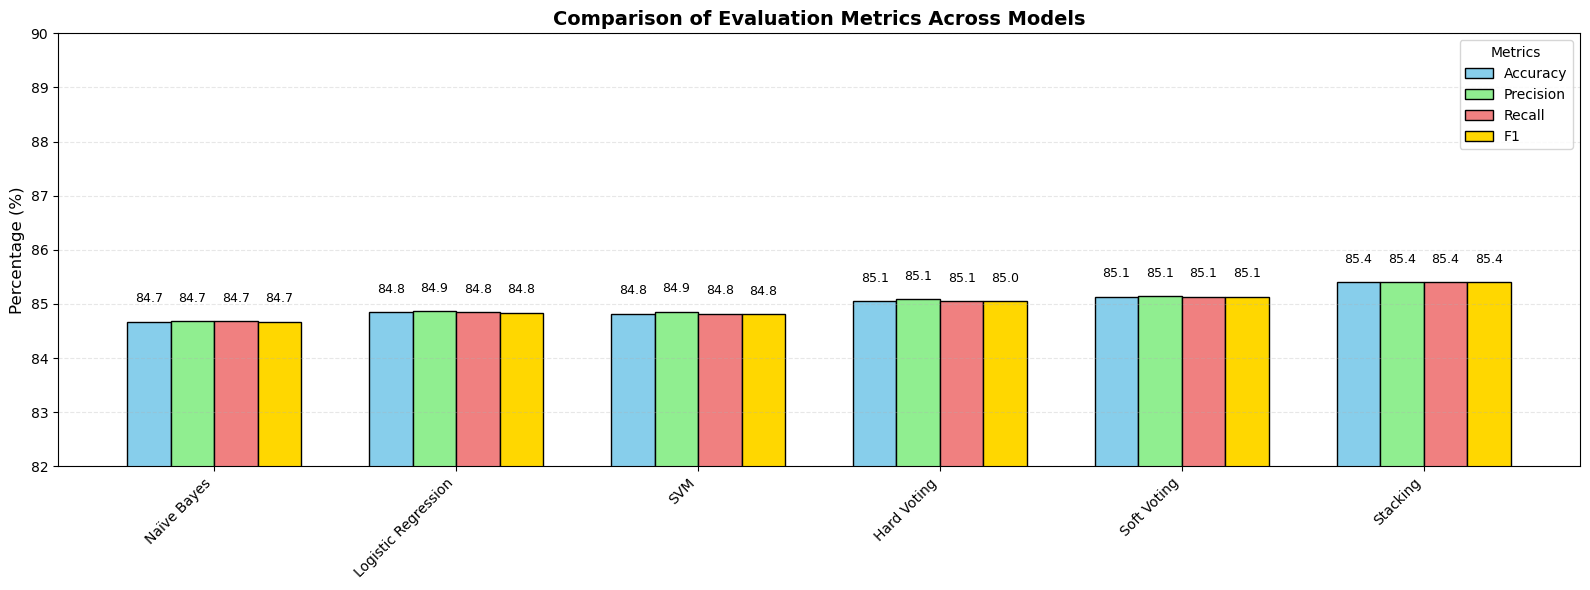

In [118]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and models
# Build metrics dataframe
metrics_df = pd.DataFrame({
    'Model': ['Naïve Bayes', 'Logistic Regression', 'SVM', 
              'Hard Voting', 'Soft Voting', 'Stacking'],
    'Accuracy': [acc_nb_opt*100, acc_lr_opt*100, acc_svm_opt*100, 
                 acc_hard_voting*100, acc_soft_voting*100, acc_stack*100],
    'Precision': [
        precision_score(y_test, y_pred_nb_opt, average='macro')*100,
        precision_score(y_test, y_pred_lr_opt, average='macro')*100,
        precision_score(y_test, y_pred_svm_opt, average='macro')*100,
        precision_score(y_test, y_pred_hard, average='macro')*100,
        precision_score(y_test, y_pred_soft, average='macro')*100,
        precision_score(y_test, y_pred_stack, average='macro')*100
    ],
    'Recall': [
        recall_score(y_test, y_pred_nb_opt, average='macro')*100,
        recall_score(y_test, y_pred_lr_opt, average='macro')*100,
        recall_score(y_test, y_pred_svm_opt, average='macro')*100,
        recall_score(y_test, y_pred_hard, average='macro')*100,
        recall_score(y_test, y_pred_soft, average='macro')*100,
        recall_score(y_test, y_pred_stack, average='macro')*100
    ],
    'F1': [
        f1_score(y_test, y_pred_nb_opt, average='macro')*100,
        f1_score(y_test, y_pred_lr_opt, average='macro')*100,
        f1_score(y_test, y_pred_svm_opt, average='macro')*100,
        f1_score(y_test, y_pred_hard, average='macro')*100,
        f1_score(y_test, y_pred_soft, average='macro')*100,
        f1_score(y_test, y_pred_stack, average='macro')*100
    ]
})
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
models = metrics_df['Model'].tolist()
num_metrics = len(metrics_to_plot)
num_models = len(models)

# Set positions for each group of bars
x = np.arange(num_models)
width = 0.18  

# Colors for each metric
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']

plt.figure(figsize=(16,6))

# Plot each metric
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width - (width*num_metrics)/2 + width/2, metrics_df[metric],
            width=width, color=colors[i], label=metric, edgecolor='black')

# Add labels and title
plt.xticks(x, models, rotation=45, ha='right')
plt.ylabel('Percentage (%)', fontsize=12)
plt.title('Comparison of Evaluation Metrics Across Models', fontsize=14, fontweight='bold')
plt.ylim(82, 90)  # focus on high-performance range
plt.legend(title='Metrics')
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Annotate values on top of bars
for i in range(num_models):
    for j in range(num_metrics):
        plt.text(x[i] + j*width - (width*num_metrics)/2 + width/2,
                 metrics_df[metrics_to_plot[j]][i] + 0.3,
                 f"{metrics_df[metrics_to_plot[j]][i]:.1f}",
                 ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 8.2. Error Analysis

In [177]:
# Find misclassified examples
misclassified_indices = np.where(y_pred_soft != y_test)[0]
print(f"Number of misclassified samples: {len(misclassified_indices)}")

# Analyze some misclassified examples
for idx in misclassified_indices[:5]:
    print(f"\nTrue label: {'ADHD' if y_test.iloc[idx] == 1 else 'OCD'}")
    print(f"Predicted: {'ADHD' if y_pred_soft[idx] == 1 else 'OCD'}")
    print(f"Text snippet: {X_test.iloc[idx][:200]}...")

Number of misclassified samples: 713

True label: ADHD
Predicted: OCD
Text snippet: hit really close home. paralyse accurate...

True label: OCD
Predicted: ADHD
Text snippet: bot, bleep, bloop. someone linked thread another place reddit...

True label: OCD
Predicted: ADHD
Text snippet: happens whenever forget say next. struggle memory hoarding absolutely hate forgetting things.....

True label: ADHD
Predicted: OCD
Text snippet: riiiight?? month hamilton wipe year kpop??...

True label: OCD
Predicted: ADHD
Text snippet: holy crap! never_been diagnosed really relate this!...


**Observation**
- Error rate: ~14.87% (713 out of 4796)

- Common errors:

    - Ambiguous language

    - Posts discussing both conditions

**Insight**: Short/incomplete posts are tend to be misclassified


# 9. Deployment and Practical Application

## 9.1. User Interface for Predictions

In [126]:
# Function to preprocess a single post (same as training)
def preprocess_user_text(text):
    import re
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import WordNetLemmatizer
    import contractions
    import emoji
    
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)
    
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    if not isinstance(text, str):
        return ""
    
    # Lowercase
    text = text.lower()
    # Expand contractions
    text = contractions.fix(text)
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions
    text = re.sub(r'\@\w+|\#','', text)
    # Remove emojis
    text = emoji.replace_emoji(text, replace='')
    # Remove punctuation and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize, remove stopwords, lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words and len(word) > 2]
    
    return " ".join(tokens)

# Function to predict using stacking
def predict_user_post(text, model, vectorizer):
    cleaned_text = preprocess_user_text(text)
    vect_text = vectorizer.transform([cleaned_text])
    pred_label = model.predict(vect_text)[0]
    pred_prob = model.predict_proba(vect_text).max()  # confidence
    label_map = {0: "OCD", 1: "ADHD"}  # update if your encoding is different
    return label_map[pred_label], pred_prob

# Example usage:
user_input = input("Enter a Reddit post or sentence:\n")
predicted_label, confidence = predict_user_post(user_input, stacking, tfidf)  
print(f"\nPrediction: {predicted_label}")
print(f"Confidence: {confidence*100:.2f}%")


Enter a Reddit post or sentence:
 i have diagnosed with ocd 



Prediction: OCD
Confidence: 99.35%


## 9.2. Interactive Prediction Example

In [ ]:
# Collect multiple posts from user
user_posts = []
print("Enter Reddit posts one by one. Type 'exit' when finished.\n")

while True:
    post = input("Enter a post: ")
    if post.strip().upper() == "EXIT" or post.strip() == "":
        break
    user_posts.append(post)

# Predict function for multiple posts
def predict_multiple_posts(posts, model, vectorizer):
    results = []
    for post in posts:
        label, prob = predict_user_post(post, model, vectorizer)
        results.append((post, label, prob))
    return results

# Run predictions
predictions = predict_multiple_posts(user_posts, stacking, tfidf)

# Display results
for post, label, prob in predictions:
    print(f"\nPost: {post}")
    print(f"Prediction: {label}")
    print(f"Confidence: {prob*100:.2f}%")


# 10. Advanced Evaluation: ROC Analysis

## 10.1. Comprehensive ROC Curve Analysis

In [128]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get Probability Scores 
# Logistic Regression
y_proba_lr = best_lr.predict_proba(X_test_tfidf)[:, 1]

# Calibrated Linear SVM (for probabilities)
y_proba_svm = best_svm_cal.predict_proba(X_test_tfidf)[:, 1]

# Naïve Bayes
y_proba_nb = best_nb.predict_proba(X_test_tfidf)[:, 1]

# Stacking Ensemble
y_proba_stack = stacking.predict_proba(X_test_tfidf)[:, 1]

#  Compute ROC and AUC 
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_stack, tpr_stack, _ = roc_curve(y_test, y_proba_stack)
roc_auc_stack = auc(fpr_stack, tpr_stack)



## 10.2. Individual ROC Curves

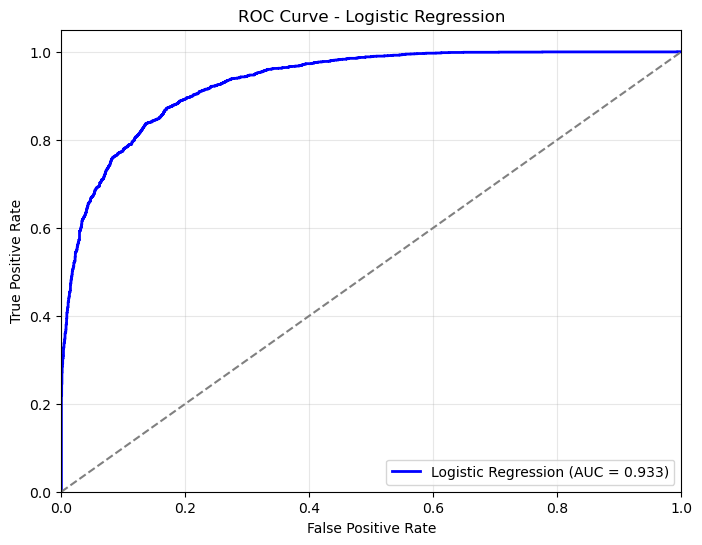

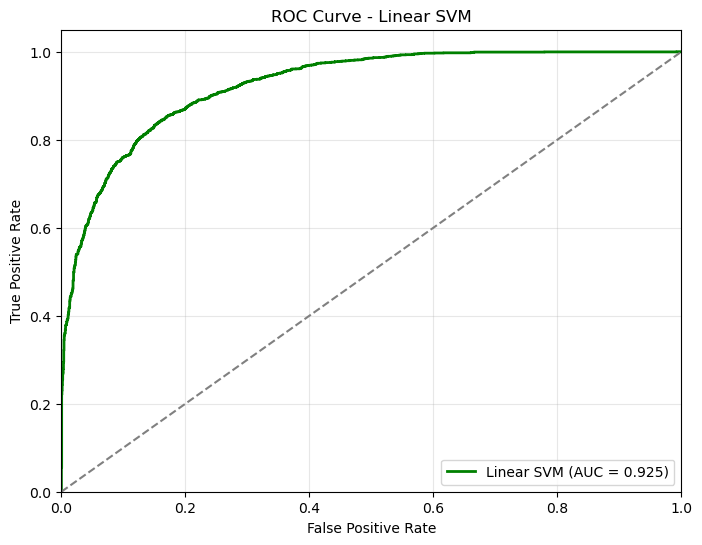

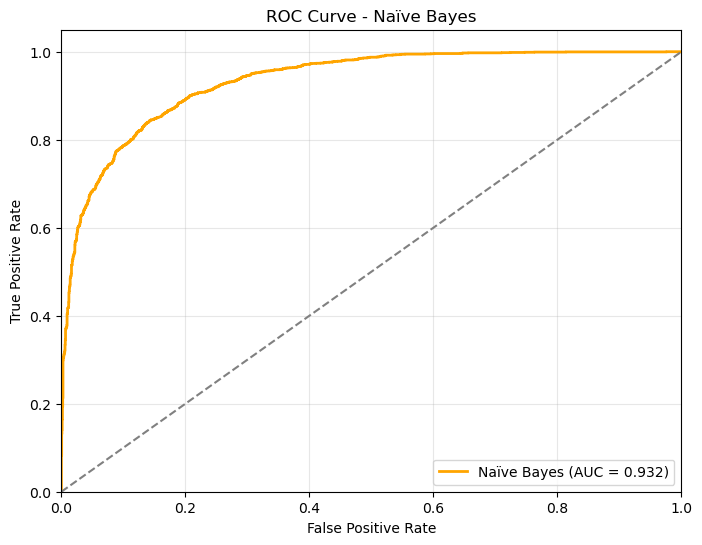

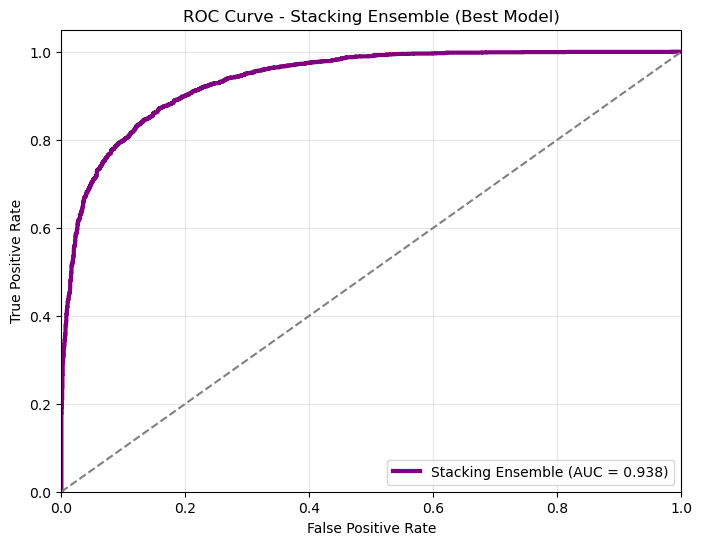

In [130]:
# Individual ROC Curves 
# 1. Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 2. Linear SVM
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'Linear SVM (AUC = {roc_auc_svm:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear SVM')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 3. Naïve Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naïve Bayes (AUC = {roc_auc_nb:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naïve Bayes')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# 4. Stacking Ensemble
plt.figure(figsize=(8, 6))
plt.plot(fpr_stack, tpr_stack, color='purple', lw=3, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacking Ensemble (Best Model)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

## 10.3. Combined ROC Comparison

In [ ]:
#  Combined ROC Curve 
plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'Linear SVM (AUC = {roc_auc_svm:.3f})')
plt.plot(fpr_nb, tpr_nb, color='orange', lw=2, label=f'Naïve Bayes (AUC = {roc_auc_nb:.3f})')
plt.plot(fpr_stack, tpr_stack, color='purple', lw=3, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison: ADHD vs OCD Classification', fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print AUC values
print("ROC AUC Scores:")
print(f"Logistic Regression : {roc_auc_lr:.3f}")
print(f"Linear SVM          : {roc_auc_svm:.3f}")
print(f"Naïve Bayes         : {roc_auc_nb:.3f}")
print(f"Stacking Ensemble   : {roc_auc_stack:.3f}")

## 10.3. Feature Importance Implementation

FEATURE IMPORTANCE - SIMPLE VISUALIZATION


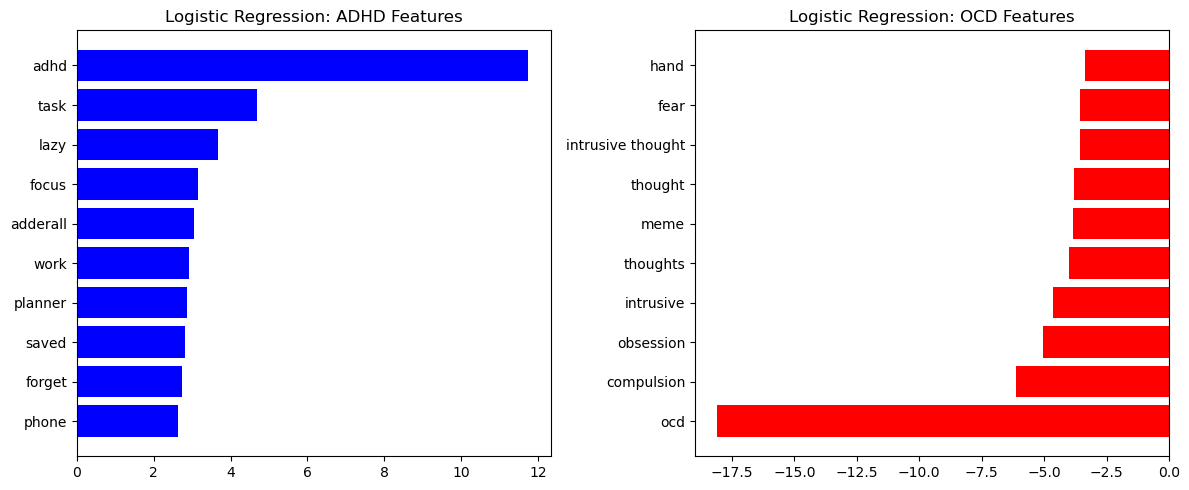

In [148]:
import matplotlib.pyplot as plt
import numpy as np

print("Feature Importance Implementation")
print("="*50)

# Get feature names
feature_names = tfidf.get_feature_names_out()

# 1. Logistic regression
if hasattr(best_lr, 'coef_'):
    plt.figure(figsize=(12, 5))
    
    coef = best_lr.coef_[0]
    top_adhd_idx = np.argsort(coef)[-10:]  # Top 10 ADHD words
    top_ocd_idx = np.argsort(coef)[:10]    # Top 10 OCD words
    
    plt.subplot(1, 2, 1)
    plt.barh([feature_names[i] for i in top_adhd_idx], [coef[i] for i in top_adhd_idx], color='blue')
    plt.title('Logistic Regression: ADHD Features')
    
    plt.subplot(1, 2, 2)
    plt.barh([feature_names[i] for i in top_ocd_idx], [coef[i] for i in top_ocd_idx], color='red')
    plt.title('Logistic Regression: OCD Features')
    
    plt.tight_layout()
    plt.show()


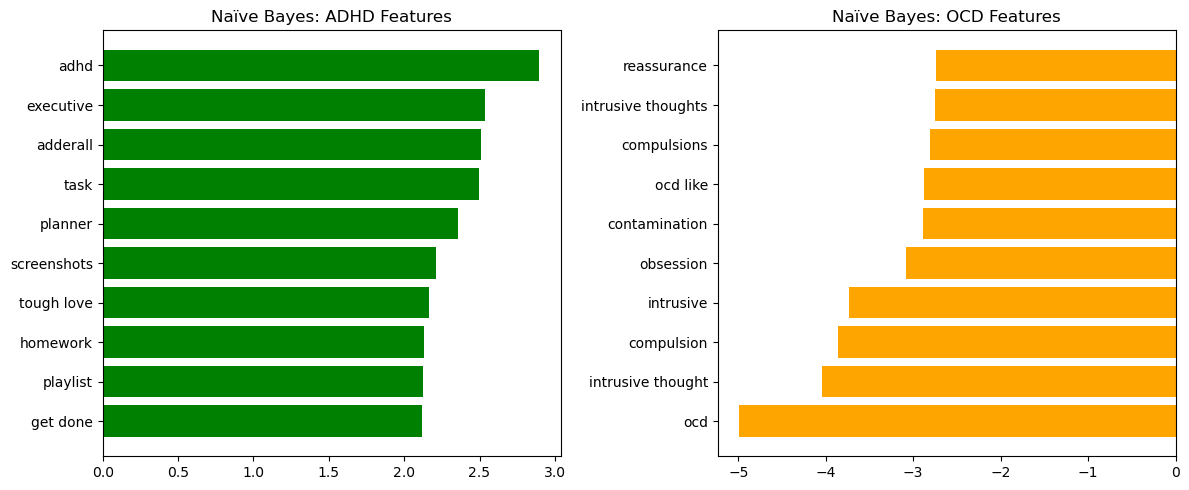

In [150]:
# 2.  Naïve Bayes
if hasattr(best_nb, 'feature_log_prob_'):
    plt.figure(figsize=(12, 5))
    
    prob_ratio = best_nb.feature_log_prob_[1] - best_nb.feature_log_prob_[0]
    top_adhd_idx = np.argsort(prob_ratio)[-10:]
    top_ocd_idx = np.argsort(prob_ratio)[:10]
    
    plt.subplot(1, 2, 1)
    plt.barh([feature_names[i] for i in top_adhd_idx], [prob_ratio[i] for i in top_adhd_idx], color='green')
    plt.title('Naïve Bayes: ADHD Features')
    
    plt.subplot(1, 2, 2)
    plt.barh([feature_names[i] for i in top_ocd_idx], [prob_ratio[i] for i in top_ocd_idx], color='orange')
    plt.title('Naïve Bayes: OCD Features')
    
    plt.tight_layout()
    plt.show()


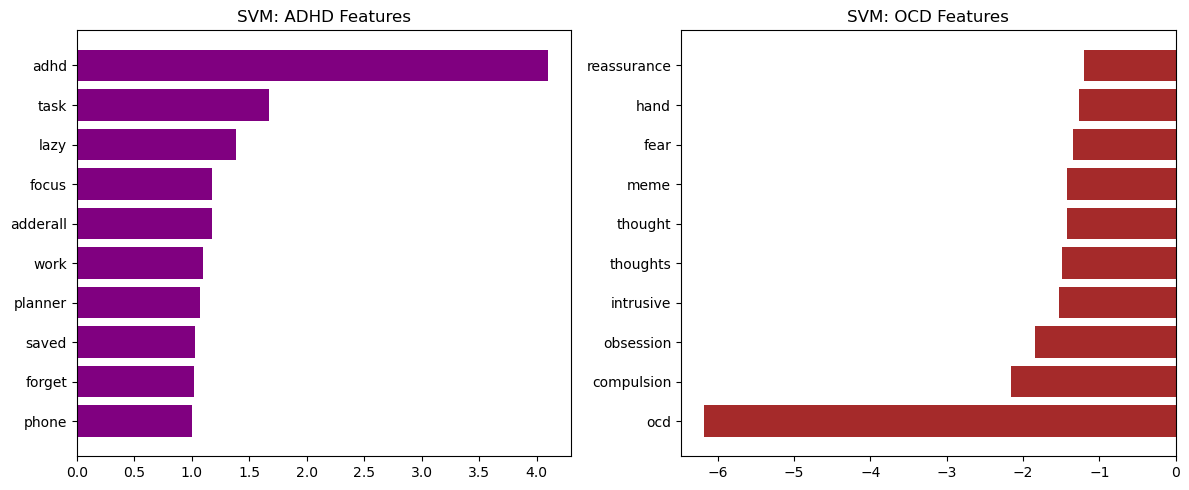

In [151]:
# 3. SVM
if hasattr(best_svm, 'coef_'):
    plt.figure(figsize=(12, 5))
    
    coef = best_svm.coef_[0]
    top_adhd_idx = np.argsort(coef)[-10:]
    top_ocd_idx = np.argsort(coef)[:10]
    
    plt.subplot(1, 2, 1)
    plt.barh([feature_names[i] for i in top_adhd_idx], [coef[i] for i in top_adhd_idx], color='purple')
    plt.title('SVM: ADHD Features')
    
    plt.subplot(1, 2, 2)
    plt.barh([feature_names[i] for i in top_ocd_idx], [coef[i] for i in top_ocd_idx], color='brown')
    plt.title('SVM: OCD Features')
    
    plt.tight_layout()
    plt.show()

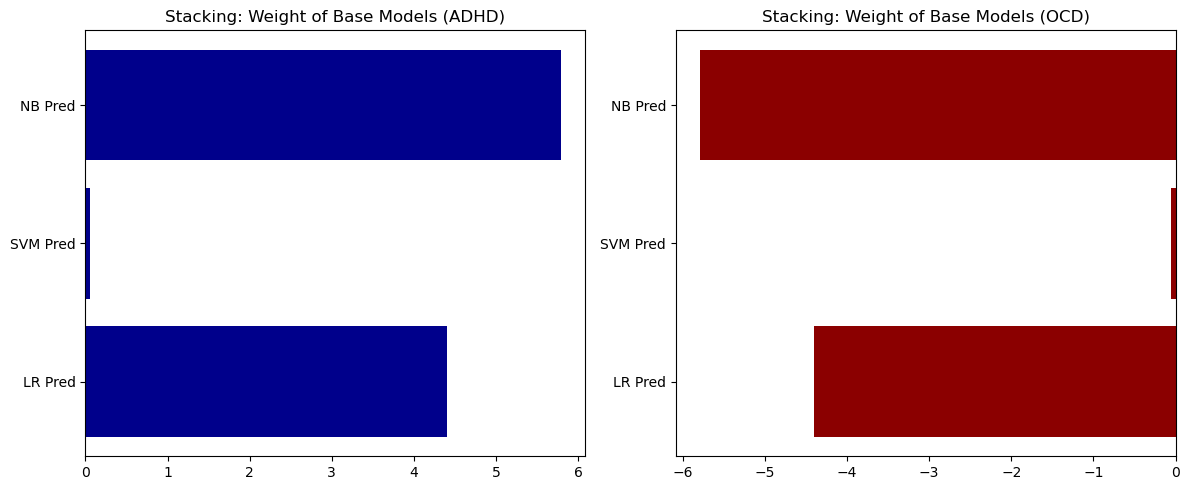

DONE! All feature importance graphs shown.


In [154]:
# 4. Stacking 
if 'stacking' in locals() and hasattr(stacking, 'final_estimator_'):
    plt.figure(figsize=(12, 5))
    
    coef = stacking.final_estimator_.coef_[0]
    
    plt.subplot(1, 2, 1)
    plt.barh(['LR Pred', 'SVM Pred', 'NB Pred'], coef[:3], color='darkblue')
    plt.title('Stacking: Weight of Base Models (ADHD)')
    
    plt.subplot(1, 2, 2)
    plt.barh(['LR Pred', 'SVM Pred', 'NB Pred'], [-c for c in coef[:3]], color='darkred')
    plt.title('Stacking: Weight of Base Models (OCD)')
    
    plt.tight_layout()
    plt.show()

## Word Cloud

In [158]:
# Install wordcloud package
!pip install wordcloud

Word Clouds


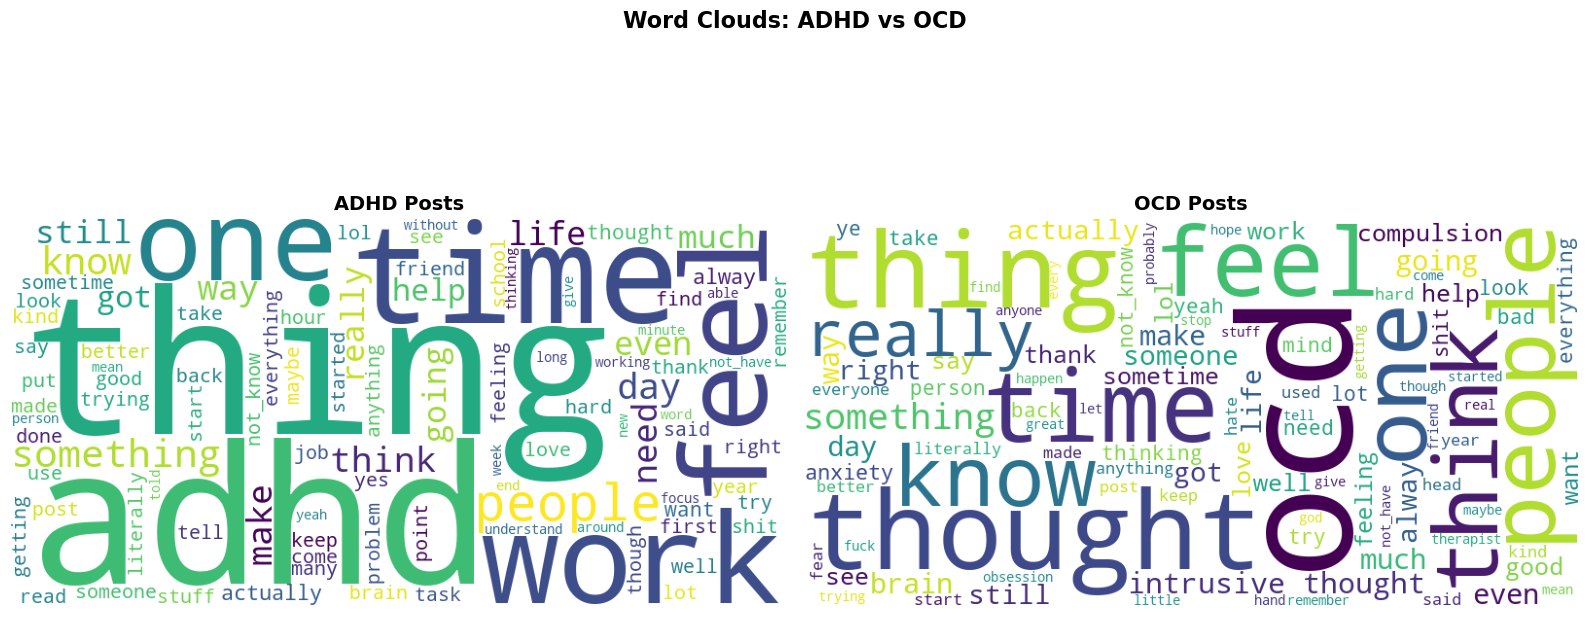

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np

print("Word Clouds")

# Get text
adhd_text = ' '.join(df_clean[df_clean['subreddit'] == 1]['cleaned_text'].astype(str))
ocd_text = ' '.join(df_clean[df_clean['subreddit'] == 0]['cleaned_text'].astype(str))

# Generate word clouds
wc_adhd = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(adhd_text)
wc_ocd = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(ocd_text)

# Convert to numpy arrays manually (FIX FOR VERSION ISSUE)
adhd_array = np.array(wc_adhd.to_image())
ocd_array = np.array(wc_ocd.to_image())

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

ax1.imshow(adhd_array)
ax1.set_title('ADHD Posts', fontsize=14, fontweight='bold')
ax1.axis('off')

ax2.imshow(ocd_array)
ax2.set_title('OCD Posts', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('Word Clouds: ADHD vs OCD', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# GitHub Version Control

## Initalize git

In [ ]:
!git init


## Add remote origin

In [ ]:
!git remote add origin https://github.com/jeshmin-shrestha/ADHD-OCD-Reddit-Classifier.git


## Check status

In [ ]:
!git status


## Add all files

In [ ]:
!git add .


## Commit with message

In [ ]:
!git commit -m " commit: Adding Additional comments  "


## Rename branch to main

In [ ]:
!git branch -M main
!git push -u origin main


In [ ]:
# !git pull origin main --allow-unrelated-histories


## Push to remote

In [ ]:
!git push origin main
